In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine_data.csv')

In [3]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label',"Alcohol",'Malic acid']

In [5]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Malic acid', ylabel='Density'>

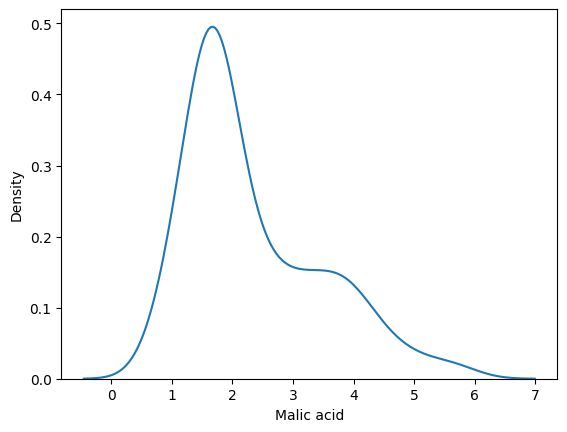

In [7]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Density'>

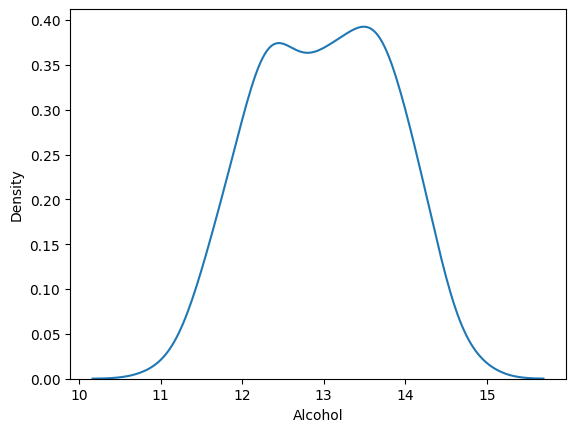

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

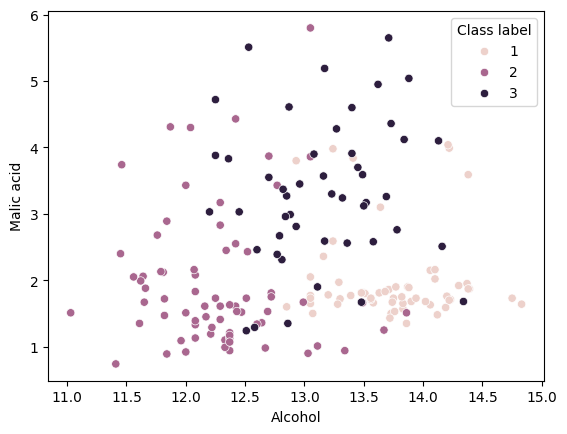

In [9]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'])

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),
                                              df['Class label'],
                                              test_size=0.3,
                                              random_state=0)


In [12]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

#fit the scaler to train data it will learn the parameters
scaler.fit(X_train)

#now after scaler we need to scale(transform our data)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [16]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [17]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [19]:
X_test_scaled.sample()

,Alcohol,Malic acid
1,0.473118,0.37395


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

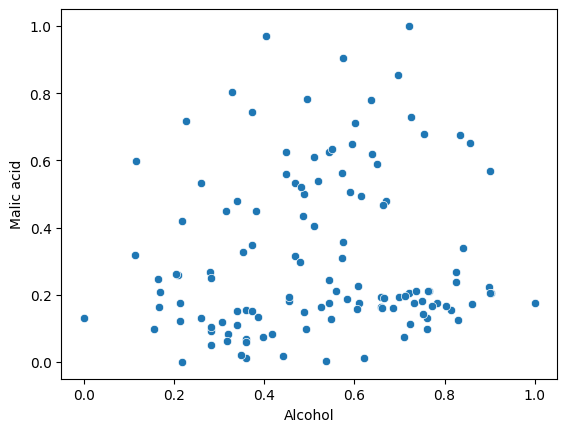

In [20]:
sns.scatterplot(x=X_train_scaled['Alcohol'],y=X_train_scaled['Malic acid'])

#nochange only range change